## Desafio 1º Período CIS
| Autor: | Hugo Silva de Vasconcelos |
| --- | --- |
| Data: | 06/07/2023 |
|Dataset: | [Breast Cancer Wisconsin Diagnostic Dataset](https://www.kaggle.com/datasets/utkarshx27/breast-cancer-wisconsin-diagnostic-dataset) |

Dataset: https://www.kaggle.com/datasets/utkarshx27/breast-cancer-wisconsin-diagnostic-dataset?resource=download

Dados sobre câncer de mama, com 569 amostras e 31 atributos, sendo 29 numéricos e 2 categóricos.

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [86]:
df_kmeans = pd.read_csv('brca.csv', index_col=0)
df_kmeans.head(10)

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
2,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
3,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
5,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B
6,12.050,14.63,78.04,449.3,0.10310,0.09092,0.06592,0.027490,0.1675,0.06043,...,20.70,89.88,582.6,0.14940,0.21560,0.30500,0.06548,0.2747,0.08301,B
7,13.490,22.30,86.91,561.0,0.08752,0.07698,0.04751,0.033840,0.1809,0.05718,...,31.82,99.00,698.8,0.11620,0.17110,0.22820,0.12820,0.2871,0.06917,B
8,11.760,21.60,74.72,427.9,0.08637,0.04966,0.01657,0.011150,0.1495,0.05888,...,25.72,82.98,516.5,0.10850,0.08615,0.05523,0.03715,0.2433,0.06563,B
9,13.640,16.34,87.21,571.8,0.07685,0.06059,0.01857,0.017230,0.1353,0.05953,...,23.19,96.08,656.7,0.10890,0.15820,0.10500,0.08586,0.2346,0.08025,B
10,11.940,18.24,75.71,437.6,0.08261,0.04751,0.01972,0.013490,0.1868,0.06110,...,21.33,83.67,527.2,0.11440,0.08906,0.09203,0.06296,0.2785,0.07408,B


In [87]:
print(df_kmeans.shape)

(569, 31)


In [88]:
# Transformando a coluna y em 0 e 1 (One Hot Encoding)
df_kmeans['y'] = df_kmeans['y'].map({'B': 0, 'M': 1})
df_kmeans.head(10)

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,0
2,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,0
3,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,0
4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,0
5,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,0
6,12.050,14.63,78.04,449.3,0.10310,0.09092,0.06592,0.027490,0.1675,0.06043,...,20.70,89.88,582.6,0.14940,0.21560,0.30500,0.06548,0.2747,0.08301,0
7,13.490,22.30,86.91,561.0,0.08752,0.07698,0.04751,0.033840,0.1809,0.05718,...,31.82,99.00,698.8,0.11620,0.17110,0.22820,0.12820,0.2871,0.06917,0
8,11.760,21.60,74.72,427.9,0.08637,0.04966,0.01657,0.011150,0.1495,0.05888,...,25.72,82.98,516.5,0.10850,0.08615,0.05523,0.03715,0.2433,0.06563,0
9,13.640,16.34,87.21,571.8,0.07685,0.06059,0.01857,0.017230,0.1353,0.05953,...,23.19,96.08,656.7,0.10890,0.15820,0.10500,0.08586,0.2346,0.08025,0
10,11.940,18.24,75.71,437.6,0.08261,0.04751,0.01972,0.013490,0.1868,0.06110,...,21.33,83.67,527.2,0.11440,0.08906,0.09203,0.06296,0.2785,0.07408,0


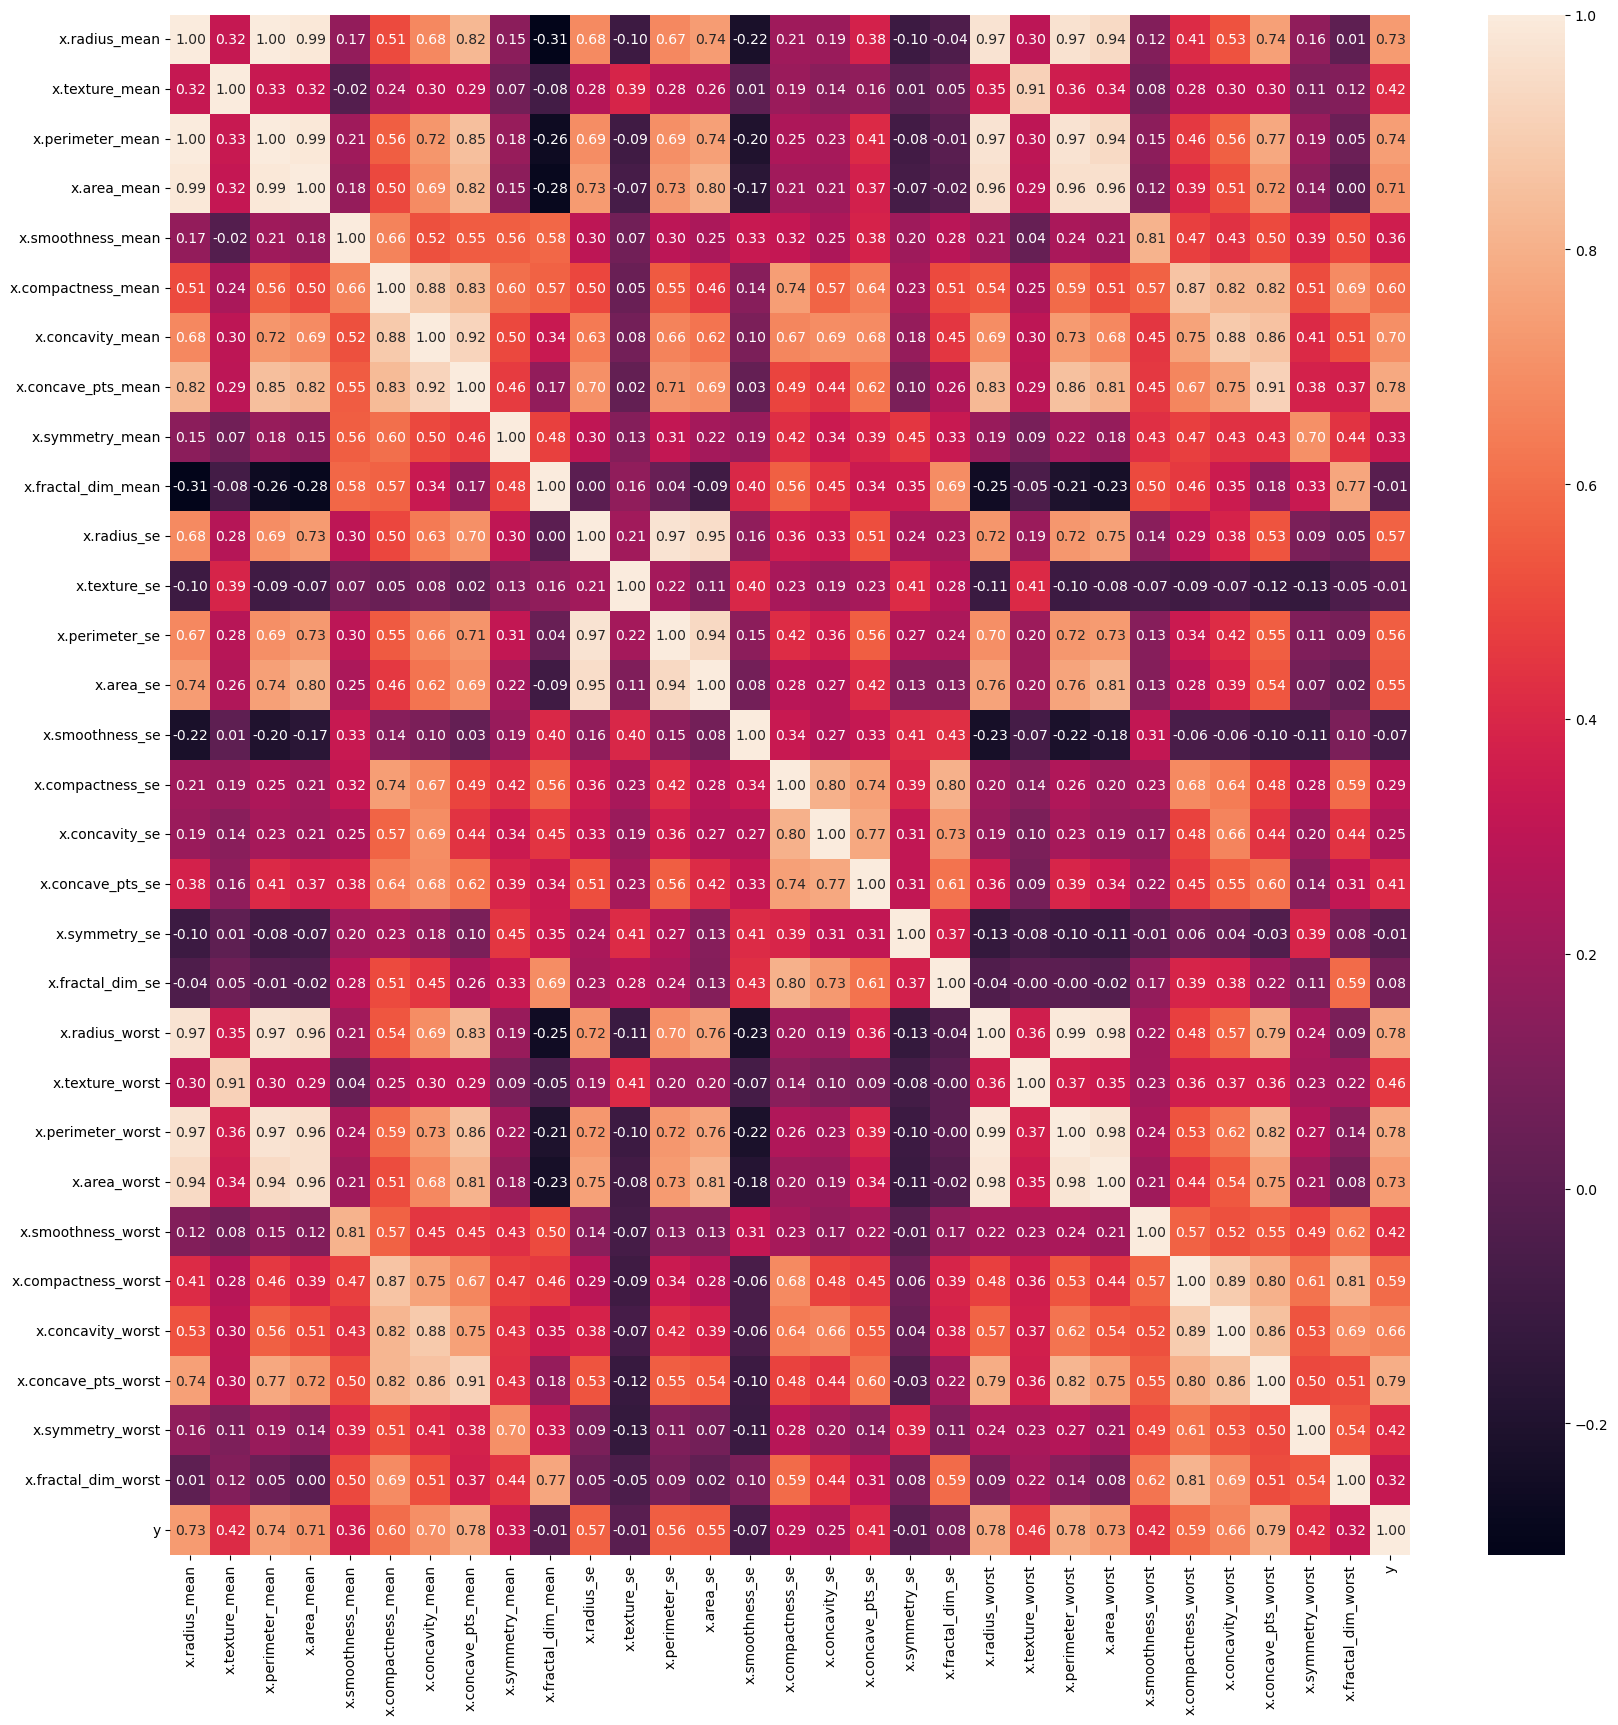

In [89]:
# Plotando a matriz de correlação
corr = df_kmeans.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

Analisando a matriz de correlação dos dados, observa-se uma forte correlação entre a coluna y (Diagnóstico) e as colunas 'x_concave_pts_worst' e 'x_perimeter_worst', indicando que esses atributos são os mais relevantes para a classificação neste caso onde a visualização dos dados é feita em duas dimensões.

In [90]:
df_analise = df_kmeans[['x.concave_pts_worst', 'x.perimeter_worst', 'y']]
df_analise.head()

,x.concave_pts_worst,x.perimeter_worst,y
1,0.12880,99.70,0
2,0.07283,96.09,0
3,0.06227,65.13,0
4,0.05013,84.46,0
5,0.02564,57.26,0


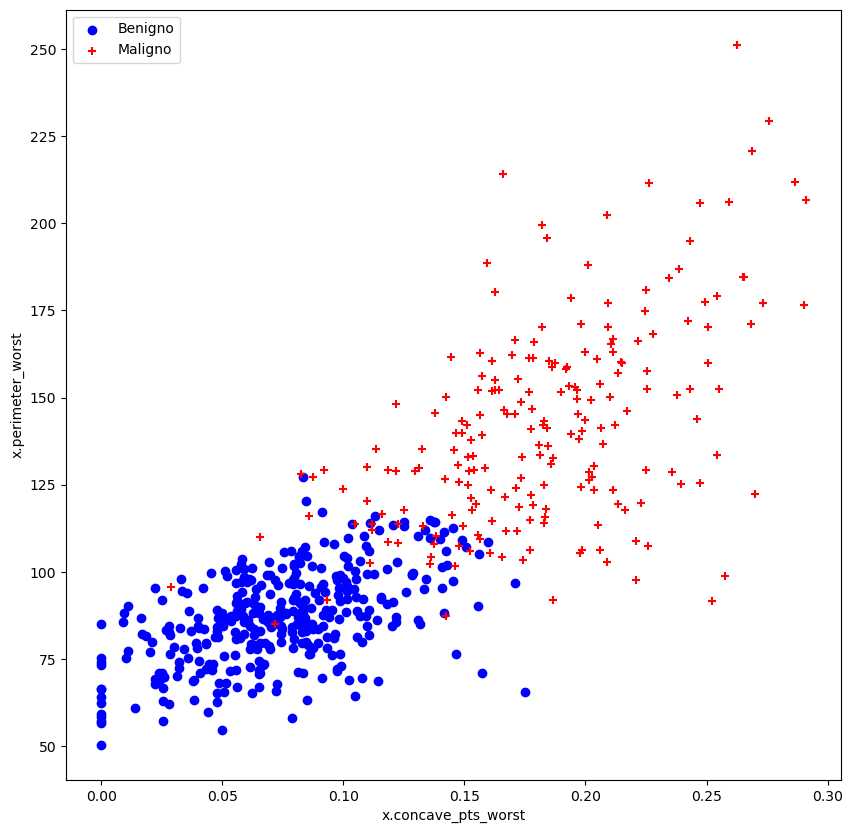

In [91]:
plt.figure(figsize=(10, 10))
plt.scatter(df_analise[df_analise['y'] == 0]['x.concave_pts_worst'], df_analise[df_analise['y'] == 0]['x.perimeter_worst'], marker='o', color='blue', label='Benigno')
plt.scatter(df_analise[df_analise['y'] == 1]['x.concave_pts_worst'], df_analise[df_analise['y'] == 1]['x.perimeter_worst'], marker='+', color='red', label='Maligno')
plt.xlabel('x.concave_pts_worst')
plt.ylabel('x.perimeter_worst')
plt.legend()
plt.show()

In [102]:
# Executando o K-Means
df_test = df_analise[['x.concave_pts_worst', 'x.perimeter_worst']]
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(df_test)
df_test['kmeans'] = kmeans.labels_
df_test.head()

/home/hugo/anaconda3/envs/CIS/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,x.concave_pts_worst,x.perimeter_worst,kmeans
1,0.12880,99.70,1
2,0.07283,96.09,1
3,0.06227,65.13,1
4,0.05013,84.46,1
5,0.02564,57.26,1


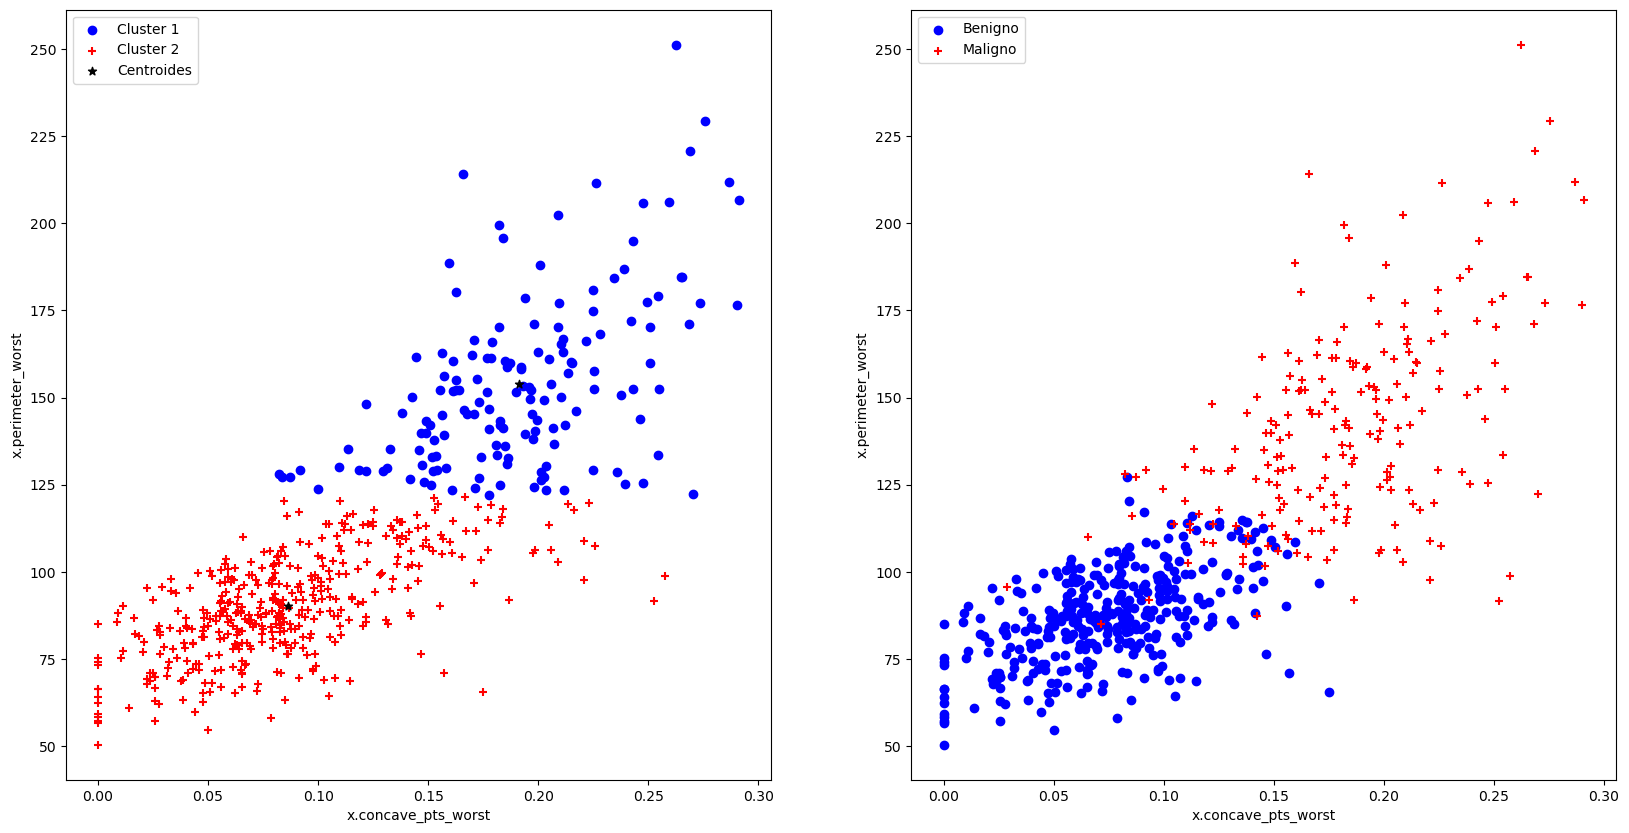

In [105]:
# Plotando o resultado do K-Means (com centroides destacados) vs Real
fig = plt.figure(figsize=(20, 10))
fig.add_subplot(1,2,1)
plt.scatter(df_test[df_test['kmeans'] == 0]['x.concave_pts_worst'], df_test[df_test['kmeans'] == 0]['x.perimeter_worst'], marker='o', color='blue', label='Cluster 1')
plt.scatter(df_test[df_test['kmeans'] == 1]['x.concave_pts_worst'], df_test[df_test['kmeans'] == 1]['x.perimeter_worst'], marker='+', color='red', label='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', color='black', label='Centroides')
plt.xlabel('x.concave_pts_worst')
plt.ylabel('x.perimeter_worst')
plt.legend()

fig.add_subplot(1,2,2)
plt.scatter(df_kmeans[df_kmeans['y'] == 0]['x.concave_pts_worst'], df_kmeans[df_kmeans['y'] == 0]['x.perimeter_worst'], marker='o', color='blue', label='Benigno')
plt.scatter(df_kmeans[df_kmeans['y'] == 1]['x.concave_pts_worst'], df_kmeans[df_kmeans['y'] == 1]['x.perimeter_worst'], marker='+', color='red', label='Maligno')
plt.xlabel('x.concave_pts_worst')
plt.ylabel('x.perimeter_worst')
plt.legend()



Como é possível observar no gráfico acima, o algoritmo kmeans se aproximou bastante da classificação real na maioria dos casos, apenas invertendo a classe devido ao fato deste algoritmo ser não supervisionado. Abaixo será feita a inversão da classe manualmente para validação das métricas.

In [95]:
# Invertendo Classificação do Kmeans para se adequar à classificação real

df_test['kmeans'] = df_test['kmeans'].map({0: 1, 1: 0})


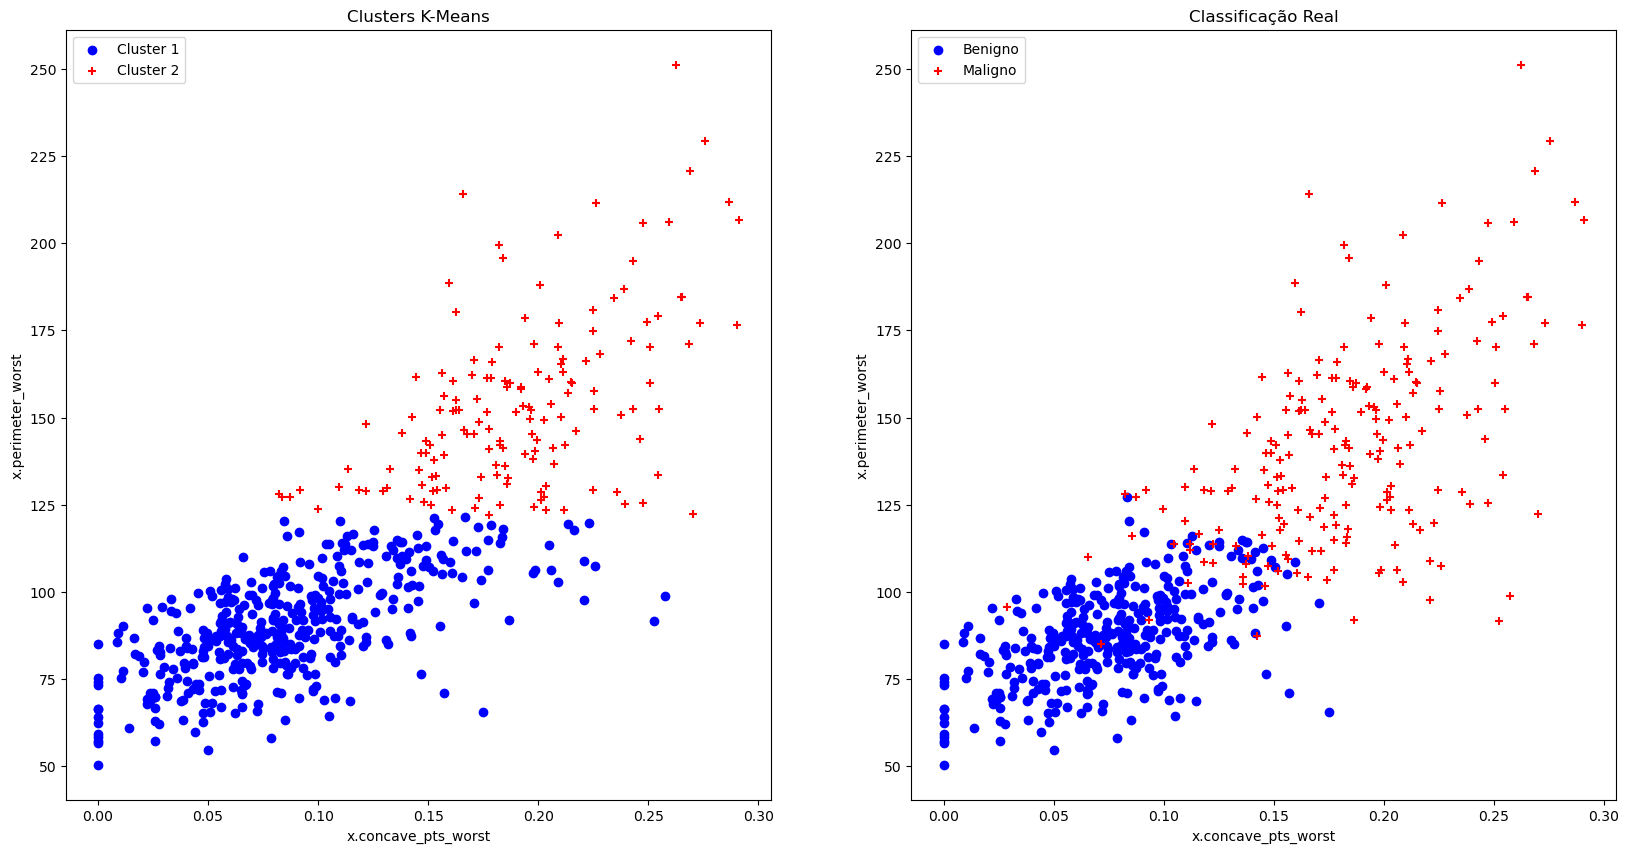

In [96]:
# Plotando novamente o resultado do K-Means vs Real
fig = plt.figure(figsize=(20, 10))
fig.add_subplot(1,2,1)
plt.scatter(df_test[df_test['kmeans'] == 0]['x.concave_pts_worst'], df_test[df_test['kmeans'] == 0]['x.perimeter_worst'], marker='o', color='blue', label='Cluster 1')
plt.scatter(df_test[df_test['kmeans'] == 1]['x.concave_pts_worst'], df_test[df_test['kmeans'] == 1]['x.perimeter_worst'], marker='+', color='red', label='Cluster 2')
plt.xlabel('x.concave_pts_worst')
plt.ylabel('x.perimeter_worst')
plt.title("Clusters K-Means")
plt.legend()

fig.add_subplot(1,2,2)
plt.scatter(df_kmeans[df_kmeans['y'] == 0]['x.concave_pts_worst'], df_kmeans[df_kmeans['y'] == 0]['x.perimeter_worst'], marker='o', color='blue', label='Benigno')
plt.scatter(df_kmeans[df_kmeans['y'] == 1]['x.concave_pts_worst'], df_kmeans[df_kmeans['y'] == 1]['x.perimeter_worst'], marker='+', color='red', label='Maligno')
plt.xlabel('x.concave_pts_worst')
plt.ylabel('x.perimeter_worst')
plt.title("Classificação Real")
plt.legend()

In [97]:
# Compara erro do K-Means com o real
from sklearn.metrics import confusion_matrix
matriz_conf = confusion_matrix(df_kmeans['y'], df_test['kmeans'])
print("Matriz de Confusão:\n", matriz_conf)

# Calcula acurácia
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(df_kmeans['y'], df_test['kmeans'])
print("Acurácia:", acuracia)

# Calcula precisão
from sklearn.metrics import precision_score
precisao = precision_score(df_kmeans['y'], df_test['kmeans'])
print("Precisão:", precisao)

# Calcula recall
from sklearn.metrics import recall_score
recall = recall_score(df_kmeans['y'], df_test['kmeans'])
print("Recall:", recall)

Matriz de Confusão:
 [[356   1]
 [ 59 153]]
Acurácia: 0.8945518453427065
Precisão: 0.9935064935064936
Recall: 0.7216981132075472


Observando os resultados, pode se observar que com apenas alguns parâmetros já é possível obter um resultado relativamente satisfatório na classificação dos dados.

### Regressão

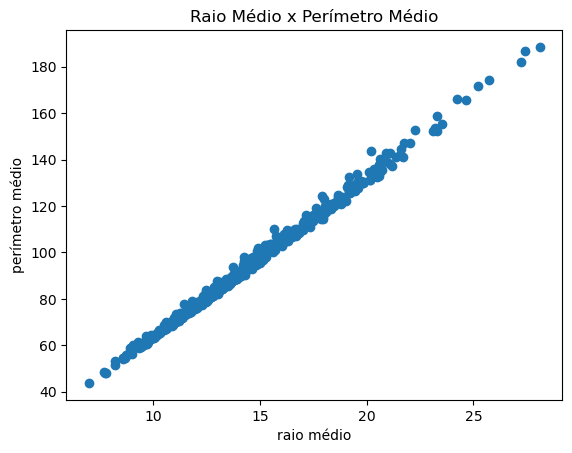

In [100]:
plt.scatter(df_kmeans['x.radius_mean'], df_kmeans['x.perimeter_mean'])
plt.xlabel('raio médio')
plt.ylabel('perímetro médio')
plt.title('Raio Médio x Perímetro Médio')
plt.show()
            

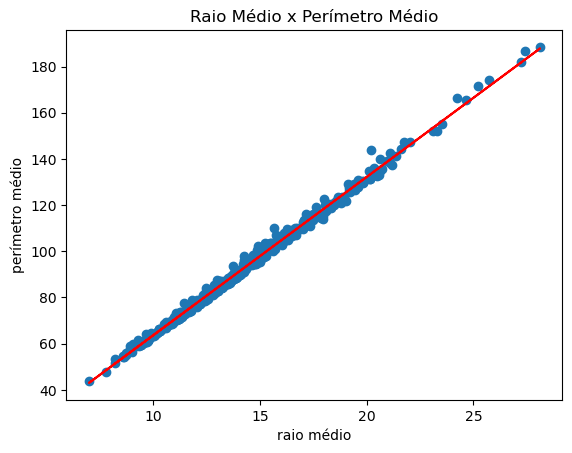

Erro Quadrático Médio: 2.8573738645794844


In [101]:
# Regressão Linear

#Separando dataset em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_kmeans['x.radius_mean'], df_kmeans['x.perimeter_mean'], test_size=0.2, random_state=42)

# Treinando o modelo
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))

# Plotando o resultado
plt.scatter(X_train, y_train)
plt.plot(X_train, reg.predict(X_train.values.reshape(-1, 1)), color='red')
plt.xlabel('raio médio')
plt.ylabel('perímetro médio')
plt.title('Raio Médio x Perímetro Médio')
plt.show()

# Calculando o erro
from sklearn.metrics import mean_squared_error
y_pred = reg.predict(X_test.values.reshape(-1, 1))
print("Erro Quadrático Médio:", mean_squared_error(y_test, y_pred))


No caso da regressão, foram utilizados os parâmetros raio médio e perímetro médio para treinar o modelo de regressão. Como os parâmetros fortemente correlacionados, observa-se um erro quadrático médio relativamente baixo, indicando que o modelo se ajustou bem aos dados.